# Regression
#### For USA housing prediction
Reference : https://www.kaggle.com/gpandi007/usa-housing-dataset


#### Author Detail 
* Name:  Omer Javed
* Email : omerjaved11@gmail.com

### Import Required Libraries

In [979]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read Data Set

In [980]:
train = pd.read_csv('Dataset/usa-housing-dataset/housing_train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [981]:
test = pd.read_csv('Dataset/usa-housing-dataset/housing_test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [982]:
print (train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [983]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [984]:
int(len(train)/3)

486

In [985]:
train.dtypes[train.dtypes == float]

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [986]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [987]:
# Count nan values in columns
removed_columns = train.columns[train.isnull().sum(axis = 0) > 100]
print(removed_columns)

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


Drop columns having more than 100 nan values

In [988]:
train.drop(train.columns[train.isnull().sum(axis = 0) > 100],axis=1,inplace=True)

In [989]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [990]:
# Remaining Nan
print(train.isnull().sum(axis = 0)[train.isnull().sum(axis = 0) > 0 ])


MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


In [991]:
train.fillna(method='bfill',inplace=True)

In [992]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
                 ... 
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea

In [993]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [994]:
from sklearn.preprocessing import LabelEncoder

from collections import defaultdict
d = defaultdict(LabelEncoder)

categorical_data = train[train.columns[train.dtypes == object]]

# # Encoding the variable
fit = categorical_data.apply(lambda x: d[x.name].fit_transform(x))

# # Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# fit = categorical_data.apply(lambda x: d[x.name].transform(x))



In [995]:
y = train.SalePrice
train = train[train.columns[train.dtypes != object]]
train = train.join(fit)


/home/omer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


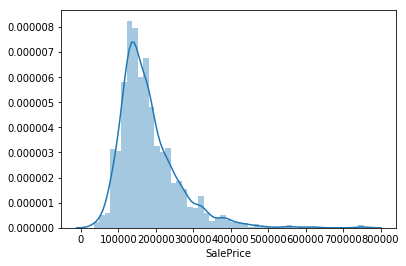

In [996]:
sns.distplot(train.SalePrice)

In [997]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,4,2,6,1,1,4,4,2,8,4
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,4,3,6,1,1,4,4,2,8,4
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,4,2,6,1,1,4,4,2,8,4
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,4,2,6,5,2,4,4,2,8,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,4,2,6,1,1,4,4,2,8,4


In [998]:
corr = train.corr()
corr = corr.round(2)
corr.style.background_gradient()
# print (corr)


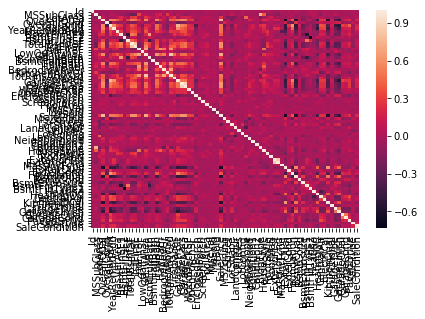

In [999]:

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

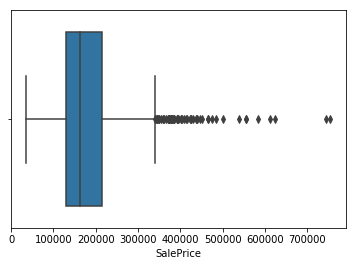

In [1000]:
sns.boxplot(x=train['SalePrice'])


In [1001]:
selected_features = ['YearBuilt', 'YearRemodAdd', 'FullBath', 
           'TotRmsAbvGrd','OverallQual', 'GrLivArea','TotalBsmtSF', 
           '1stFlrSF', 'GarageCars', 'GarageArea','KitchenAbvGr',
           'KitchenQual','GarageType',
           'MasVnrArea', 'Fireplaces', 'GarageYrBlt'
          , 'BsmtFinSF2', 'GarageFinish',
           'Neighborhood','CentralAir','Electrical',
           'HalfBath','RoofStyle']

In [1002]:
X = train[selected_features]

In [1003]:
y = train['SalePrice']

In [1004]:
X.head()

,YearBuilt,YearRemodAdd,FullBath,TotRmsAbvGrd,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,...,MasVnrArea,Fireplaces,GarageYrBlt,BsmtFinSF2,GarageFinish,Neighborhood,CentralAir,Electrical,HalfBath,RoofStyle
0,2003,2003,2,8,7,1710,856,856,2,548,...,196.0,0,2003.0,0,1,5,1,4,1,1
1,1976,1976,2,6,6,1262,1262,1262,2,460,...,0.0,1,1976.0,0,1,24,1,4,0,1
2,2001,2002,2,6,7,1786,920,920,2,608,...,162.0,1,2001.0,0,1,5,1,4,1,1
3,1915,1970,1,7,7,1717,756,961,3,642,...,0.0,1,1998.0,0,2,6,1,4,0,1
4,2000,2000,2,9,8,2198,1145,1145,3,836,...,350.0,1,2000.0,0,1,15,1,4,1,1


In [1005]:
# X_norm=(X-X.min())/(X.max()-X.min())
# X_norm.head()

In [1006]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1007]:
# preprocessing 
# remove columns and fill na bfill

In [1008]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1009]:
print ('X_Train:',X_train.shape)
print ('y_Train:',y_train.shape)
print ('X_Test:',X_test.shape)
print ('y_Test:',y_test.shape)

X_Train: (1022, 23)
y_Train: (1022,)
X_Test: (438, 23)
y_Test: (438,)


In [1010]:
from sklearn.linear_model import LinearRegression
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
lm = LinearRegression()
lm.fit(X_train,y_train)

The scikit-learn version is 0.19.2.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [1011]:
predictions = lm.predict(X_test)

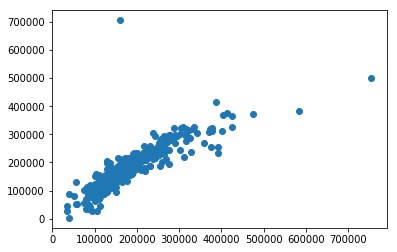

In [1012]:
plt.scatter(y_test,predictions)

In [1013]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [ 2.37773157e+02  1.88838903e+02 -7.42119326e+03  1.45572118e+03
  1.24502233e+04  4.68892366e+01  2.86663945e+01  5.43094823e+00
  4.50680098e+03  3.05128851e+01 -2.35777517e+04 -1.41874834e+04
  2.10649812e+02  2.44740136e+01  5.68365600e+03 -2.41892735e+01
 -1.01564717e+00 -5.64479886e+03  4.36491813e+02  7.85812236e+02
  4.53323191e+02 -6.18888364e+02  1.97514973e+03]
Mean squared error: 1762513922.54
Variance score: 0.72


In [1014]:
train_accuracy = lm.score(X_train,y_train)
print('Train accuracy: ', train_accuracy*100,'%')
test_accuracy = lm.score(X_test,y_test)
print('Test accuracy: ', test_accuracy*100,'%')

# X = train[['YearBuilt', 'YearRemodAdd', 'FullBath', 
#            'TotRmsAbvGrd','OverallQual', 'GrLivArea','TotalBsmtSF', 
#            '1stFlrSF', 'GarageCars', 'GarageArea','KitchenAbvGr',
#           'GarageFinish', 'KitchenQual','GarageType',
#            'MasVnrArea', 'Fireplaces', 'GarageYrBlt']]

Train accuracy:  83.19359324593543 %
Test accuracy:  71.99172453655088 %


### Train on all data

In [1015]:
l_model = LinearRegression()
l_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1016]:
test_X = test[selected_features]

In [1017]:
test_X.head()

,YearBuilt,YearRemodAdd,FullBath,TotRmsAbvGrd,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,...,MasVnrArea,Fireplaces,GarageYrBlt,BsmtFinSF2,GarageFinish,Neighborhood,CentralAir,Electrical,HalfBath,RoofStyle
0,1961,1961,1,5,5,896,882.0,896,1.0,730.0,...,0.0,0,1961.0,144.0,Unf,NAmes,Y,SBrkr,0,Gable
1,1958,1958,1,6,6,1329,1329.0,1329,1.0,312.0,...,108.0,0,1958.0,0.0,Unf,NAmes,Y,SBrkr,1,Hip
2,1997,1998,2,6,5,1629,928.0,928,2.0,482.0,...,0.0,1,1997.0,0.0,Fin,Gilbert,Y,SBrkr,1,Gable
3,1998,1998,2,7,6,1604,926.0,926,2.0,470.0,...,20.0,1,1998.0,0.0,Fin,Gilbert,Y,SBrkr,1,Gable
4,1992,1992,2,5,8,1280,1280.0,1280,2.0,506.0,...,0.0,0,1992.0,0.0,RFn,StoneBr,Y,SBrkr,0,Gable


In [1018]:
test_X.fillna(method='bfill',inplace=True)

/home/omer/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [1019]:
test_X.columns

Index(['YearBuilt', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd', 'OverallQual',
       'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea',
       'KitchenAbvGr', 'KitchenQual', 'GarageType', 'MasVnrArea', 'Fireplaces',
       'GarageYrBlt', 'BsmtFinSF2', 'GarageFinish', 'Neighborhood',
       'CentralAir', 'Electrical', 'HalfBath', 'RoofStyle'],
      dtype='object')

In [1020]:
test_X.columns[test_X.dtypes == object]

Index(['KitchenQual', 'GarageType', 'GarageFinish', 'Neighborhood',
       'CentralAir', 'Electrical', 'RoofStyle'],
      dtype='object')

In [1021]:

categorical_testdata = test_X[test_X.columns[test_X.dtypes == object]]

# categorical_testdata.apply(label_encoder.transform)
# Encoding the variable
test_fit = categorical_testdata.apply(lambda x: d[x.name].transform(x))
# df.apply(lambda x: d[x.name].transform(x))



In [1022]:
categorical_testdata.columns

Index(['KitchenQual', 'GarageType', 'GarageFinish', 'Neighborhood',
       'CentralAir', 'Electrical', 'RoofStyle'],
      dtype='object')

In [1023]:
X_test = test_X[test_X.columns[test_X.dtypes != object]]
X_test = X_test.join(test_fit)


In [1024]:
X_test.head()

,YearBuilt,YearRemodAdd,FullBath,TotRmsAbvGrd,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,...,GarageYrBlt,BsmtFinSF2,HalfBath,KitchenQual,GarageType,GarageFinish,Neighborhood,CentralAir,Electrical,RoofStyle
0,1961,1961,1,5,5,896,882.0,896,1.0,730.0,...,1961.0,144.0,0,3,1,2,12,1,4,1
1,1958,1958,1,6,6,1329,1329.0,1329,1.0,312.0,...,1958.0,0.0,1,2,1,2,12,1,4,3
2,1997,1998,2,6,5,1629,928.0,928,2.0,482.0,...,1997.0,0.0,1,3,1,0,8,1,4,1
3,1998,1998,2,7,6,1604,926.0,926,2.0,470.0,...,1998.0,0.0,1,2,1,0,8,1,4,1
4,1992,1992,2,5,8,1280,1280.0,1280,2.0,506.0,...,1992.0,0.0,0,2,1,1,22,1,4,1


In [1025]:
predictions = l_model.predict(X_test)